In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

!nvidia-smi

Sun Jul  7 16:23:33 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| 31%   22C    P8    25W / 350W |  18851MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:23:00.0 Off |                  N/A |
| 35%   

In [2]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler, DPMSolverSDEScheduler

pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRealistic_v7.safetensors",
                                                torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
pipe.scheduler = DPMSolverSDEScheduler.from_config(pipe.scheduler.config)

pipe.load_lora_weights('/data/sd_results/jisoo_lora/jisoo_lora.safetensors', adapter_name="jisoo")
pipe.set_adapters(["jisoo"], [0.9])

print('done')

Some weights of the model checkpoint were not used when initializing CLIPTextModel: 
 ['text_model.embeddings.position_ids']
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .



done


/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/torchsde/_brownian/brownian_interval.py:599: UserWarning: Should have ta>=t0 but got ta=0.0291675366461277 and t0=0.029168.
  warnings.warn(f"Should have ta>=t0 but got ta={ta} and t0={self._start}.")


In /home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gaudio/anaconda

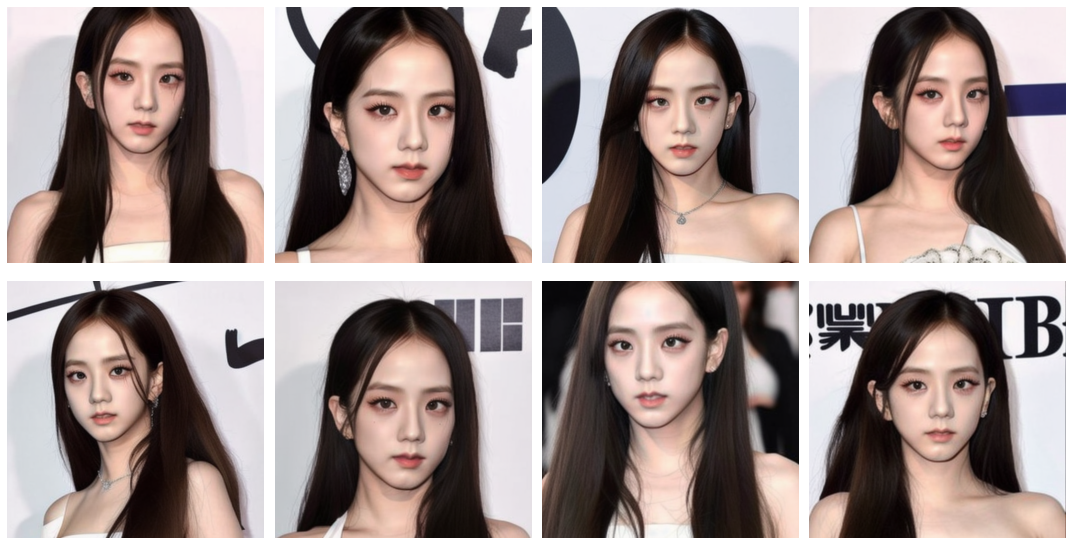

In [3]:
prompt = "jisoo, a young woman with long hair and a white dress"

images = pipe(prompt=prompt,
         height=512,
         width=512,
         num_inference_steps=20,
         guidance_scale=7,
         num_images_per_prompt=8
        ).images


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()
